In [10]:
import pandas as pd
import numpy as np
import os
#from datetime import datetime, timedelta, date, time
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
import hvplot.pandas
import holoviews as hv
pd.set_option('display.max_columns', 150, 'display.max_rows', 100, 'display.max_colwidth', 15)
%matplotlib inline
# get directory address
path= os.getcwd()+"hvplot_EDA"+ "/"

In [11]:
GREY1 = "#231F20";GREY2 = "#414040";GREY3 = "#555655";GREY4 = "#646369";GREY5 = "#76787B";GREY6 = "#828282";GREY7 = "#929497";GREY8 = "#A6A6A5";GREY9 = "#BFBEBE";BLUE1 = "#174A7E";
BLUE2 = "#4A81BF";BLUE3 = "#94B2D7";BLUE4 = "#94AFC5";BLUE5 = "#22435e";BLUE6 = "#95B3D7";RED1 = "#C3514E";RED2 = "#E6BAB7";RED3 = "#800000";GREEN1 = "#0C8040";GREEN2 = "#9ABB59"
GREEN3 = "#31859C";GREEN4 = "#4BACC6";GREEN5 = "#93CDDD";ORANGE1 = "#F79747";ORANGE2 = "#FAC090"; BLUE_CPD1= "#137FA7";BLUE_CPD2= "#00385D";BLUE_CPD3= "#EAF6FE";BLUE_CPD4= "#51BCE1"

## 1.1 Load data from csv file
> load data

Check the test set and we notice it has missing values so it needs umputing

In [13]:
#df= pd.read_csv("/Users/waleedidrees/Dropbox/Python Projects/helpful code/classification_models/loan_train.csv")
df= pd.read_csv("Customer-Churn.csv")
df=df.rename(columns= lambda df_: str.lower(df_))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [14]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone se...,No,No,No phone se...,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [15]:
df =(
df.apply(lambda df_: df_.str.lower() if df_.dtype.name == 'object' else df_)
.assign(
    seniorcitizen= df.seniorcitizen.astype("bool"),
    tenure= df.tenure.astype("int8"),
    totalcharges= pd.to_numeric(df.totalcharges, errors="coerce"),    
)
#.dropna()
.assign(churn= lambda df_: (df_.churn == "yes").astype("int8"))
)
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,5575-gnvde,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,3668-qpybk,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,7795-cfocw,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,9237-hqitu,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,False,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one year,yes,mailed check,84.80,1990.50,0
7039,2234-xaduh,female,False,yes,yes,72,yes,yes,fiber optic,no,yes,yes,no,yes,yes,one year,yes,credit card...,103.20,7362.90,0
7040,4801-jzazl,female,False,yes,yes,11,no,no phone se...,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic ...,29.60,346.45,0
7041,8361-ltmkd,male,True,yes,no,4,yes,yes,fiber optic,no,no,no,no,no,no,month-to-month,yes,mailed check,74.40,306.60,1


># Drop loan id columns bcz its just a unique identifier

In [16]:
#df = df.drop(columns=["loan_id"]).rename(columns= {"loan_status" : "target"})
df = df.drop(columns=["customerid"]).rename(columns= {"churn" : "target"})
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
0,female,False,yes,no,1,no,no phone se...,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic ...,29.85,29.85,0
1,male,False,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,0
2,male,False,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,1
3,male,False,no,no,45,no,no phone se...,dsl,yes,no,yes,yes,no,no,one year,no,bank transf...,42.30,1840.75,0
4,female,False,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic ...,70.70,151.65,1


In [17]:
target_variable= "target"
all_cols = df.drop(columns="target").columns.tolist()                      
cat_cols = df.drop(columns="target").select_dtypes(["object","category"]).columns.tolist()                      
num_cols= df.drop(columns="target").columns[~df.drop(columns="target").columns.isin(cat_cols)] 

### 1.1 Data Types and Descriptive Stats

In [18]:
df.describe(include="all").round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7043,2,False,5901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7043,2,no,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7043,2,no,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.4,24.6,0.0,9.0,29.0,55.0,72.0
phoneservice,7043,2,yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7043,3,no,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7043,3,fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinesecurity,7043,3,no,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onlinebackup,7043,3,no,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
target               0
dtype: int64

### 1.2 Exploratory Data Visualisations (EDA)

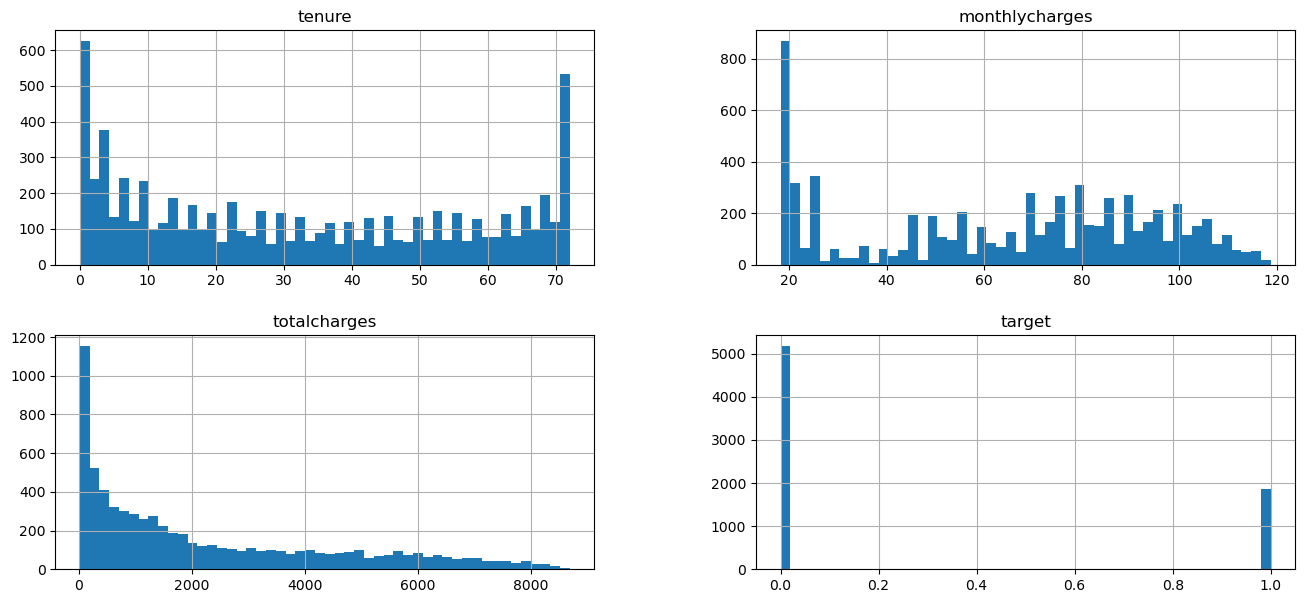

In [20]:
pd.options.plotting.backend = "matplotlib"
df.hist(
    bins=50, 
    figsize=(16,7)   
    )
plt.show()
pd.options.plotting.backend = "plotly"

# Feature importance

In [21]:
df_ratio= df.target.value_counts()
df_ratio

0    5174
1    1869
Name: target, dtype: int64

In [22]:
df_ratio[1], df_ratio[0]

(1869, 5174)

In [23]:
churrn_ratio= df_ratio[1]/ (df_ratio[1]+ df_ratio[0])
churrn_ratio

0.2653698707936959

In [24]:
#df.agg(total = pd.NamedAgg("target", "mean"))##.reset_index()

## The churn ratio is 27% approximately and the graph shows the count of non churns and churns

In [25]:
df.groupby(["target"]).agg(total = pd.NamedAgg("target", "count")).reset_index().plot.bar(color= "target", text_auto= True)

## graph below shows the count of churn and no churns gender, partner and senior citizen

In [26]:
(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["target", "variable", "value"])
    .agg(total = pd.NamedAgg( "target","count"))
    .reset_index()
    .plot.bar(x= "target", y= "total", color="value", facet_col="variable",facet_col_wrap= 5 ,   barmode= "group", height= 900, text_auto =True)
    .update_yaxes(matches =None,showticklabels=True)
    .update_xaxes(matches = None)    
)

## From the plot above it seems like the gender feature is the least important as the the churn ratios are pretty much the same for male and female

In [27]:
(
    df.melt(id_vars= ["target", "totalcharges"],value_vars= cat_cols)
    .groupby(["variable", "value"])    
    .agg(total = pd.NamedAgg("target", "mean"))
    .reset_index()    
    .assign(churn_diff =  lambda df_: df_.total - churrn_ratio)
    .assign(risk_ratio =  lambda df_: df_.total /churrn_ratio)
    .assign(high_low_risk =  lambda df_: df_.risk_ratio - 1)
    .sort_values(["risk_ratio"], ascending=False)
)


,variable,value,total,churn_diff,risk_ratio,high_low_risk
28,paymentmethod,electronic ...,0.452854,0.187484,1.706502,0.706502
0,contract,month-to-month,0.427097,0.161727,1.609440,0.609440
11,internetser...,fiber optic,0.418928,0.153558,1.578656,0.578656
19,onlinesecurity,no,0.417667,0.152297,1.573906,0.573906
38,techsupport,no,0.416355,0.150985,1.568960,0.568960
16,onlinebackup,no,0.399288,0.133918,1.504645,0.504645
5,deviceprote...,no,0.391276,0.125906,1.474456,0.474456
32,streamingmo...,no,0.336804,0.071434,1.269188,0.269188
23,paperlessbi...,yes,0.335651,0.070281,1.264842,0.264842
35,streamingtv,no,0.335231,0.069861,1.263261,0.263261


* Positive risk ratio mean higher risk and negative means lower risk
* -negative values magnitude tells us that this category is least likely to leave
* positive values magnitude tells us that this category is most likely to leave
* the risk ratio for female and male is closer to 1 and it means that being male or female is not making much of difference

# Catagorical Feature Importance
* For categorical variables, one such metric is mutual information, which tells how much information we learn about one variable if we learn the value of the other variable. It’s a concept from information theory, and in machine learning, we often use it to measure the mutual dependency between two variables. Higher values of mutual information mean a higher degree of dependence

In [28]:
from sklearn.metrics import mutual_info_score
feat_importance=[]
for x in cat_cols:
    imp= pd.DataFrame(
    {"feats": [x],
    "score": [mutual_info_score(df[x], df.target).round(2)]}
    )
    feat_importance.append(imp)

feat_imp_cat= pd.concat(feat_importance, axis=0).sort_values("score", ascending=False).reset_index(drop=True)
feat_imp_cat

,feats,score
0,contract,0.10
1,internetser...,0.06
2,onlinesecurity,0.06
3,techsupport,0.06
4,onlinebackup,0.05
5,deviceprote...,0.04
6,paymentmethod,0.04
7,streamingtv,0.03
8,streamingmo...,0.03
9,paperlessbi...,0.02


* we can ignore , gender, phoneservice and mutliplelines

In [29]:
feat_imp_cat= feat_imp_cat[feat_imp_cat.score >= 0.01]
cat_cols=feat_imp_cat.feats.values.tolist()
cat_cols

['contract',
 'internetservice',
 'onlinesecurity',
 'techsupport',
 'onlinebackup',
 'deviceprotection',
 'paymentmethod',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'partner',
 'dependents']

In [30]:
df.corr(numeric_only=True)[["target"]]

,target
seniorcitizen,0.150889
tenure,-0.352229
monthlycharges,0.193356
totalcharges,-0.199484
target,1.000000


* all the numeric features have strong correlation and are important features for analysis

# Look for correlation between all variables and target variable

In [31]:
df_cor= df.corr(numeric_only= True).round(3)
df_cor

,seniorcitizen,tenure,monthlycharges,totalcharges,target
seniorcitizen,1.000,0.017,0.220,0.102,0.151
tenure,0.017,1.000,0.248,0.826,-0.352
monthlycharges,0.220,0.248,1.000,0.651,0.193
totalcharges,0.102,0.826,0.651,1.000,-0.199
target,0.151,-0.352,0.193,-0.199,1.000


In [32]:
p = df_cor.hvplot.heatmap(x="columns", y= "index", rot =45, cmap= "Oranges" , width = 1000, height=400)
p * hv.Labels(p).opts(text_font_size = "8pt")

:Overlay
   .HeatMap.I :HeatMap   [columns,index]   (value)
   .Labels.I  :Labels   [columns,index]   (value)

## Remove Feats which have high correlation between themselves to avoid autocorrelation

In [33]:
df_cor= df.corr(numeric_only= True).round(3).assign(target = lambda df_:  abs(df_.target))
df_cor

,seniorcitizen,tenure,monthlycharges,totalcharges,target
seniorcitizen,1.000,0.017,0.220,0.102,0.151
tenure,0.017,1.000,0.248,0.826,0.352
monthlycharges,0.220,0.248,1.000,0.651,0.193
totalcharges,0.102,0.826,0.651,1.000,0.199
target,0.151,-0.352,0.193,-0.199,1.000


In [34]:
cols_to_keep = []
for col in num_cols:
    cor_cols=(
            df_cor.drop(columns="target")
            [df_cor > .8]
            .query( '{0} > .8 '.format(col))
    ).index.tolist()
    cols= df_cor[df_cor.index.isin(cor_cols)].sort_values("target", ascending=False).index[0]
    cols_to_keep.append(cols)

In [35]:
cols_to_keep

['seniorcitizen', 'tenure', 'monthlycharges', 'tenure']

In [36]:
num_cols= pd.DataFrame({"num_cols":cols_to_keep}).drop_duplicates()["num_cols"].values.tolist()
num_cols

['seniorcitizen', 'tenure', 'monthlycharges']

In [37]:
num_cols

['seniorcitizen', 'tenure', 'monthlycharges']

In [38]:
df= df[["target"]+num_cols+ cat_cols]
df

,target,seniorcitizen,tenure,monthlycharges,contract,internetservice,onlinesecurity,techsupport,onlinebackup,deviceprotection,paymentmethod,streamingtv,streamingmovies,paperlessbilling,partner,dependents
0,0,False,1,29.85,month-to-month,dsl,no,no,yes,no,electronic ...,no,no,yes,yes,no
1,0,False,34,56.95,one year,dsl,yes,no,no,yes,mailed check,no,no,no,no,no
2,1,False,2,53.85,month-to-month,dsl,yes,no,yes,no,mailed check,no,no,yes,no,no
3,0,False,45,42.30,one year,dsl,yes,yes,no,yes,bank transf...,no,no,no,no,no
4,1,False,2,70.70,month-to-month,fiber optic,no,no,no,no,electronic ...,no,no,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,False,24,84.80,one year,dsl,yes,yes,no,yes,mailed check,yes,yes,yes,yes,yes
7039,0,False,72,103.20,one year,fiber optic,no,no,yes,yes,credit card...,yes,yes,yes,yes,yes
7040,0,False,11,29.60,month-to-month,dsl,yes,no,no,no,electronic ...,no,no,yes,yes,yes
7041,1,True,4,74.40,month-to-month,fiber optic,no,no,no,no,mailed check,no,no,yes,yes,no


### Pair plot

In [39]:
# import seaborn as sns
# sns.pairplot(df, hue='target', height=3)

>#  Custom Mix Immputer class

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted # This function just makes sure that the object is fitted
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class mix_imputer(BaseEstimator, TransformerMixin):
     def __init__(self, impute_missing =True):                                
        self.impute_missing = impute_missing        
                
     def fit(self, X, y = None):         
         return self
 
     def transform(self, X):
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.preprocessing import LabelEncoder
        encoder= LabelEncoder()

        X = X.copy()
        cols = X.select_dtypes(["object","category"]).columns.tolist()       
        
        if self.impute_missing:                        
            # we use LabelEncoder bcz it keeps the Nan values of catergories and converts labels (i.e male, female, gay) to 0., 1., 2. floats            
            mapped_dic = {}

            for abc in cols:                
                X[[abc]]=( 
                    X[[abc]].apply(lambda series: pd.Series(
                    encoder.fit_transform(series[series.notnull()]),
                    index=series[series.notnull()].index
                    ))
                    )
                encode_dic= { x: y for x,y in zip ( X[abc][ X[abc].notnull()].unique(), encoder.classes_)}   
                mapped_dic[abc]= encode_dic                 
                        
            # after encoding data apply knn imputer on all the data and fill missing values.            
            imp_knn = IterativeImputer(estimator= KNeighborsRegressor(n_jobs=-1, n_neighbors= X.shape[1]), 
                            #initial_strategy='most_frequent',
                            max_iter=100, random_state=0)
            
            # imputed values are returned in arrays so convert it back to dataframe
            X = pd.DataFrame(imp_knn.fit_transform(X), columns= X.columns.tolist())               
            
            # round of all categorical columns so that if imputed value is 0.6 it will be converted to 1. instead
            X[cols] = X[cols].round(0).astype("int")
            # now convert all the computed values from 1. , 2. encoding to original labels.    
            
            for abc in cols:
                X[abc] = X[abc].map(mapped_dic[abc])            
            
            # After this step we can again convert the categorical columns to dummies using onehot encoding
        else:
            X = X.copy()
        return X


># Impute missing Values

In [41]:
from sklearn.impute import SimpleImputer
df_final=  mix_imputer(impute_missing=True).fit_transform(df)
df_final=df_final .reset_index(drop=True)

In [42]:
df_final.isna().sum()

target              0
seniorcitizen       0
tenure              0
monthlycharges      0
contract            0
internetservice     0
onlinesecurity      0
techsupport         0
onlinebackup        0
deviceprotection    0
paymentmethod       0
streamingtv         0
streamingmovies     0
paperlessbilling    0
partner             0
dependents          0
dtype: int64

In [43]:
target_variable= "target"
df_x = df_final.drop(columns=target_variable)
df_y = df_final[target_variable]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_y = encoder.fit_transform(df_y)
df_y[1:20]

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [44]:
df_final.target.loc[1:20]

1     0.0
2     1.0
3     0.0
4     1.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    0.0
18    1.0
19    0.0
20    1.0
Name: target, dtype: float64

In [45]:
df_final[target_variable].value_counts()

0.0    5174
1.0    1869
Name: target, dtype: int64

# Train/Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size = 0.3, stratify=df_y, random_state =42
    )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4930, 15), (4930,), (2113, 15), (2113,))

# Random Oversampling
Random Oversampling is simply randomly picking data points in our minority class and duplicating them. 

# Random Undersampling
Random Undersampling is simply randomly picking data points in our majority class and removing them. 

# Synthetic Minority Oversampling (SMOTE)
Synthetic Minority Oversampling (SMOTE) is an oversampling technique that creates synthetic data points. SMOTE address’ the core problem in oversampling. Oversampling creates duplicate datapoints whereas SMOTE slightly alters these data points. 

# Borderline Smote
The idea behind borderline SMOTE is that we only want to use data that’s at risk of being misclassified as the data to be oversampled. In this case, we build a classifier to classify points as positive or negative. Then, for the data points we misclassify, we oversample those data points. This would hopefully train our algorithm to better recognize these difficult instances and correct for them. 

# Adaptive Synthetic Oversampling (ADASYN)
The idea behind AdaSyn is to use a weight distribution of our minority class. Essentially, we give higher weight to instances that are more difficult to learn and lower weight to instances that are easier to learn. AdaSyn is very similar to safe-level SMOTE, except there’s just a different way of computing the synthetic data points. 

In [47]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN 
up_smpl = RandomOverSampler(random_state = 42) 
#up_smpl = RandomUnderSampler(random_state = 42) 
#up_smpl = SMOTE(random_state = 42) 
#up_smpl = BorderlineSMOTE(random_state = 42) 
#up_smpl = ADASYN(random_state = 42) 

#X_train,y_train = up_smpl.fit_resample(X_train,y_train)


# Preprocess Data

In [48]:
# preprocess imports
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # use this pipe line to use smote upsampling as sklearn pipeline doesnt work with smote
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

># Preprocessor

In [49]:
# seperate columns
all_cols = X_train.columns.tolist()                      
cat_cols = X_train.select_dtypes(["object","category"]).columns.tolist()                      
num_cols= X_train.columns[~X_train.columns.isin(cat_cols)] 

num_pipe= Pipeline (
        steps =[
        #("normalize" , preprocessing.Normalizer( norm='l2')),
        #("minmax" , preprocessing.MinMaxScaler()),
        # ("auantile", preprocessing.QuantileTransformer(
        #     output_distribution='normal',n_quantiles=500, random_state=0)),
        #("std_scaler", preprocessing.StandardScaler()),        
        ("variance_filter", VarianceThreshold(threshold= 0.1)),        
                ]
                    )
cat_pipe= Pipeline (
        steps =[        
        ("one_hot", OneHotEncoder (sparse_output=False, drop= "first", handle_unknown= "ignore")),
        ("variance_filter", VarianceThreshold(threshold= 0.1)),
                ]
                    )

prep = ColumnTransformer(
    transformers= [      
        ("num", num_pipe, num_cols), 
        ("cat", cat_pipe, cat_cols),              
        ],        
n_jobs=-1,
verbose_feature_names_out=False
).set_output(transform="pandas")

prep.fit_transform(X_train)


,seniorcitizen,tenure,monthlycharges,contract_one year,contract_two year,internetservice_fiber optic,internetservice_no,onlinesecurity_no internet service,onlinesecurity_yes,techsupport_no internet service,techsupport_yes,onlinebackup_no internet service,onlinebackup_yes,deviceprotection_no internet service,deviceprotection_yes,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check,streamingtv_no internet service,streamingtv_yes,streamingmovies_no internet service,streamingmovies_yes,paperlessbilling_yes,partner_yes,dependents_yes
5557,0.0,5.0,80.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2270,1.0,3.0,86.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6930,0.0,3.0,75.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2257,0.0,60.0,80.55,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
898,0.0,12.0,98.90,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,0.0,63.0,104.50,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1488,0.0,1.0,51.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6303,0.0,71.0,109.25,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2710,0.0,24.0,20.40,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# Make Models

In [50]:
# model imports
from sklearn import linear_model 
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
import xgboost
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# metric evaluation and cross validation
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

># Variable importance

In [51]:

pipe = make_pipeline(prep, tree.DecisionTreeClassifier( class_weight= "balanced" ))
pipe.fit(X_train, y_train)

feat_importances = pd.Series(pipe[1].feature_importances_  , index= prep.fit_transform(X_train).columns.tolist() )
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

># List of models

In [52]:
from sklearn.utils.class_weight import compute_class_weight
sample_weight = compute_class_weight(
             class_weight='balanced', classes=  np.unique(y_train) ,y= y_train
             ) 
MLA= {    
    "lm": linear_model.LogisticRegression(class_weight= "balanced",n_jobs= -1 ),
    "gd" : linear_model.SGDClassifier (class_weight= "balanced",n_jobs= -1 ),
    "knn" : neighbors.KNeighborsClassifier(n_jobs= -1 ),
    "dt" : tree.DecisionTreeClassifier(class_weight= "balanced"),
    "rf": ensemble.RandomForestClassifier(class_weight= "balanced",n_jobs= -1 ),
     "xgb": xgboost.XGBClassifier(),
    #"svc" : svm.SVC(class_weight= "balanced",probability=False)    
    }  

# Create complete preprocess + modelccp_pipes

In [53]:
# pipes = {}
# for x in MLA.keys():
#     if x in ["lm", "gd","svc","knn"]:
#         pipe= Pipeline(steps=[("preprocess", prep),('poly', PolynomialFeatures(degree=1)),("model", MLA[x])])
#     else:
#         pipe= Pipeline(steps=[("preprocess", prep),("model", MLA[x])])
#     pipes[x]=  pipe
# pipes.keys()

In [54]:
pipes = {}
for x in MLA.keys():    
        pipe= Pipeline(
                steps=[("preprocess", prep),
                #('sampling', up_smpl ),
                ("model", MLA[x])]
                )
        pipes[x]=  pipe
pipes.keys()

dict_keys(['lm', 'gd', 'knn', 'dt', 'rf', 'xgb'])

># Create function for valuation scores

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
def eval_scores(true, predicted):  
    results= pd.DataFrame.from_dict(classification_report(y_test, predicted, output_dict=True))    
    return results

># Test pipeline

>## Run all models once

In [56]:
from sklearn.metrics import roc_auc_score
scores= []
auc_scores ={}
for model in MLA.keys():    
    pipes[model].fit(X_train, y_train )     
    scores.append(eval_scores (y_test, pipes[model].predict(X_test)).assign(model = model))    
    auc_scores[model]= [roc_auc_score(y_test, pipes[model].predict(X_test) )] 

pd.concat(scores)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,0,1,accuracy,macro avg,weighted avg,model
precision,0.908869,0.507919,0.741126,0.708394,0.802417,lm
recall,0.719716,0.800357,0.741126,0.760037,0.741126,lm
f1-score,0.803308,0.621453,0.741126,0.712381,0.755026,lm
support,1552.000000,561.000000,0.741126,2113.000000,2113.000000,lm
precision,0.873855,0.550432,0.767629,0.712144,0.787986,gd
recall,0.798969,0.680927,0.767629,0.739948,0.767629,gd
f1-score,0.834736,0.608765,0.767629,0.721750,0.774741,gd
support,1552.000000,561.000000,0.767629,2113.000000,2113.000000,gd
precision,0.825734,0.550781,0.759110,0.688258,0.752734,knn
recall,0.851804,0.502674,0.759110,0.677239,0.759110,knn


In [57]:
pd.DataFrame(auc_scores)

,lm,gd,knn,dt,rf,xgb
0,0.760037,0.739948,0.677239,0.646602,0.674781,0.679033


> # Cross Validaiton

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

,fit_time,score_time,test_score,train_score,model
mean,0.539370,0.014701,0.784584,0.937954,xgb
mean,0.336206,0.043601,0.779716,0.996845,rf
mean,0.024069,0.042322,0.765517,0.840681,knn
mean,0.044491,0.010106,0.747059,0.749222,lm
mean,0.033287,0.012506,0.732252,0.996777,dt
mean,0.053111,0.012173,0.727586,0.727000,gd


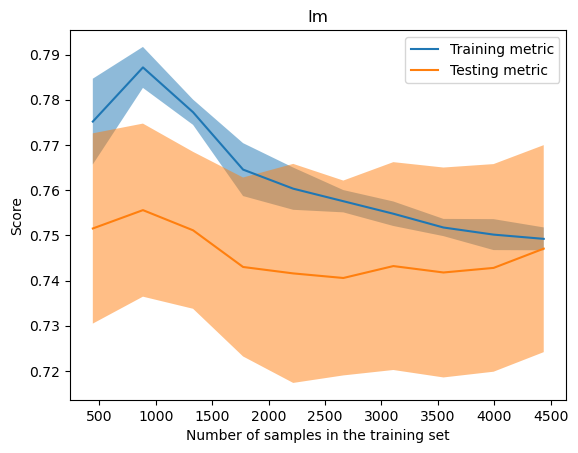

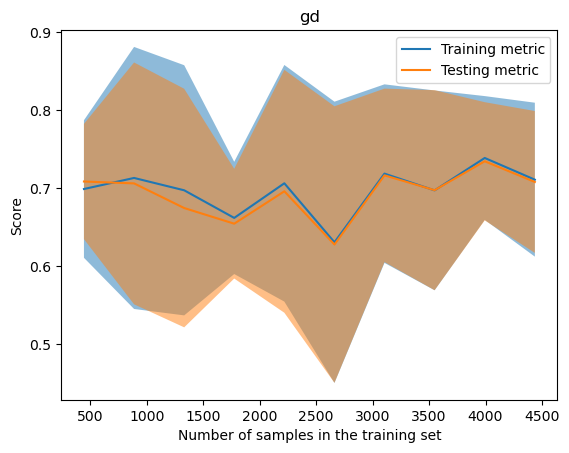

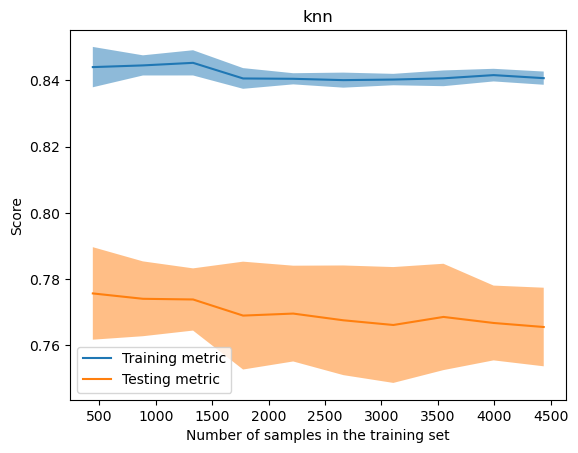

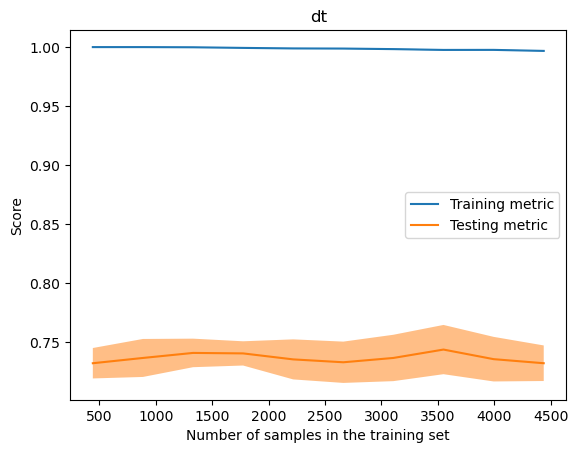

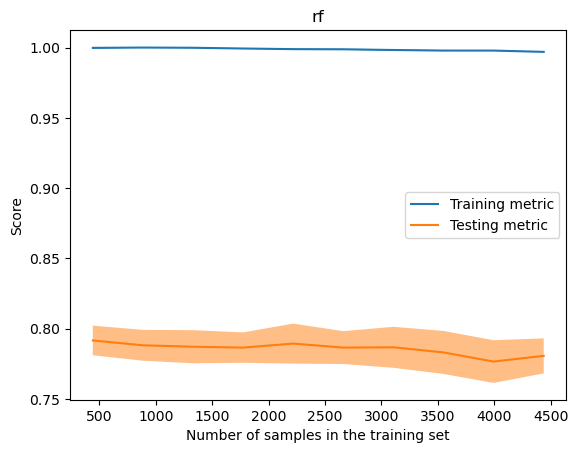

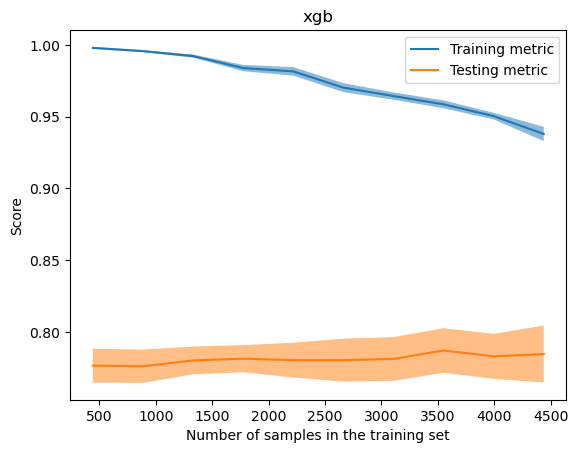

In [58]:
pd.options.plotting.backend = "matplotlib"
from sklearn.model_selection import LearningCurveDisplay

cv_scores= []
scores= []
plts= []
for x in MLA.keys():    
    cv_model_score = cross_validate(
        pipes[x] ,X_train, y_train,cv=10,return_train_score=True, n_jobs=-1, verbose= 0)
    cv_model_score_mean= (
        pd.DataFrame.from_dict(cv_model_score).agg(["mean"]).assign(model=x))
    cv_scores.append(cv_model_score_mean)    
    
    fig=LearningCurveDisplay.from_estimator(
    pipes[x], X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 ), verbose= 0 
    )   
    plt.title(x)

pd.concat(cv_scores).sort_values("test_score", ascending =False)

# Hyper Parameters

In [59]:
from scipy.stats import randint, uniform, norm,reciprocal, expon
reciprocal.rvs(20, 200000), expon.rvs(scale=1.0)
# loc is lower bound value and scale is the +- 2 range and size is number of observations 
uniform.rvs(loc=5, scale=2, size= 10),randint.rvs(low=20, high=70, size=10),norm.rvs(0.1, 1)
# use randint.rvs(1,4) and uniform.rvs to see output values
grid_solvers= ['lbfgs', 'newton-cholesky','saga']
grid_poly = randint(1,2)
grid_learn_rate = uniform(0.25, .1)
grid_alpha =  uniform(0.1, .8)
grid_penalties= ['l1','l2','elasticnet']

grid_n_neighbours= randint(3, 20)
grid_C = reciprocal(20, 20000)
grid_gamma= expon(scale=1.0)
grid_kernel = ["linear", "rbf"]

grid_n_estimator = randint(50, 1000)# Number of trees in the forest.
max_features = ['sqrt', 'log2', None]
grid_max_depth = randint(1,7) #The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
grid_min_sample_split = randint(1, 10)
grid_min_sample_leafs = randint(1, 10)

grid_subsample = uniform(0.5, 0.4)
grid_bytree = uniform(0.4, 0.5)
grid_bylevel = uniform(0.4, 0.5)

In [60]:
MLA_params = {  
    "lm": [{
         #"poly__degree": grid_poly,
         'model__penalty' : grid_penalties,         
         'model__solver' :grid_solvers,         
         'model__max_iter': [10000]
            }],    
    "gd" : [{              
        #"poly__degree":grid_poly,
        'model__n_iter_no_change': [50],
        'model__penalty' : grid_penalties,        
        'model__max_iter': [1000],
        
            }],    
     "knn" : [{
        #"poly__degree":grid_poly,
        'model__n_neighbors': grid_n_neighbours,  #Number of neighbor points to consider for prediction
        'model__weights': ['uniform', 'distance'], # weight function used in prediction
        'model__p':  [1,2], # p=1 compute manhattan distance, p=2 compute euclidean distance        
            }],
    "dt": [{
        'model__max_depth': grid_max_depth, 
        'model__max_features': max_features,   
        'model__max_leaf_nodes': grid_n_neighbours,      
        #'model__min_samples_split': grid_min_sample_split,
        'model__min_samples_leaf': grid_min_sample_leafs,        
            }],       
    "rf" : [{              
        'model__n_estimators': grid_n_estimator,  
        'model__max_depth': grid_max_depth, 
        'model__max_leaf_nodes': grid_n_neighbours,              
        'model__max_features': max_features,         
        #'model__min_samples_split': grid_min_sample_split,
        'model__min_samples_leaf': grid_min_sample_leafs,        
            }],        
    "xgb": [{
        'model__n_estimators': grid_n_estimator,  
        'model__learning_rate': grid_learn_rate,
        'model__max_depth': grid_max_depth,                
       # 'model__objective': ['reg:squarederror'],
        'model__objective':['binary:logistic'],
        'model__subsample': grid_subsample ,
        'model__scale_pos_weight': [sample_weight[1]/sample_weight[0]],
        #'model__colsample_bytree': grid_bytree,
        'model__colsample_bylevel': grid_bylevel        
        }],
    # "svc": [{
    #     "poly__degree":grid_poly,
    #     'model__kernel': grid_kernel,
    #     'model__C': grid_C,
    #     'model__gamma': grid_gamma,             
    #         }]      
    } 

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

># CV split

In [62]:
cv_split = StratifiedKFold(n_splits= 10, random_state=10 , shuffle=True)

# Run Random CV for all models

In [63]:
best_model_scores= {}
best_models = {}
cl_report= []
tune_params = {}
auc_scores ={}

for x in MLA.keys():
    grid_cv= RandomizedSearchCV(
            pipes[x],
            param_distributions = MLA_params[x],
            cv= cv_split,
            scoring='roc_auc',
            n_iter = 50,
            refit = "recall",
            verbose= 0,
            n_jobs= -1 )

    tune_grid =grid_cv.fit(X_train, y_train)

    tune_params[x]= pd.DataFrame.from_dict(tune_grid.cv_results_ ).assign(model= x)

    best_model_scores[x] = [tune_grid.best_score_]
    best_models[x] = tune_grid.best_estimator_
    best_model = tune_grid.best_estimator_
    best_model.fit(X_train, y_train)
    auc_scores[x] = [roc_auc_score (y_test,best_model.predict(X_test))]
    
    cl_report.append(eval_scores(y_test,best_model.predict(X_test)).assign(model=x))
    

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.



Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=10000, model__penalty=l1, model__solver=lbfgs; total time=   0.0s
[CV] END model__max_iter=1000

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/l

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.3s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.3s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.3s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.3s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l1; total time=   0.6s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.3s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=l2; total time=   0.3s
[CV] END model__max_iter=1000,

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter t

[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.4s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.5s
[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.4s


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END model__max_iter=1000, model__n_iter_no_change=50, model__penalty=elasticnet; total time=   0.4s
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=uniform; total time=   0.1s
[CV] END model__n_neighbors=6, model__p=1, model__weights=

In [64]:
pd.DataFrame.from_dict(best_model_scores)

,lm,gd,knn,dt,rf,xgb
0,0.842522,0.821859,0.824304,0.832779,0.841962,0.848026


In [65]:
pd.DataFrame(auc_scores)

,lm,gd,knn,dt,rf,xgb
0,0.756697,0.739562,0.702109,0.755945,0.763119,0.760627


In [66]:
pd.concat(cl_report, axis= 0)#.sort_values( "accuracy", ascending = False)

,0,1,accuracy,macro avg,weighted avg,model
precision,0.904418,0.509217,0.742073,0.706817,0.799492,lm
recall,0.725515,0.787879,0.742073,0.756697,0.742073,lm
f1-score,0.805148,0.618614,0.742073,0.711881,0.755624,lm
support,1552.000000,561.000000,0.742073,2113.000000,2113.000000,lm
precision,0.869446,0.569231,0.777094,0.719339,0.789739,gd
recall,0.819588,0.659537,0.777094,0.739562,0.777094,gd
f1-score,0.843781,0.611065,0.777094,0.727423,0.781995,gd
support,1552.000000,561.000000,0.777094,2113.000000,2113.000000,gd
precision,0.836497,0.612500,0.785613,0.724499,0.777026,knn
recall,0.880155,0.524064,0.785613,0.702109,0.785613,knn


># Cross validation on best models

In [67]:
# for x in MLA.keys():            
#     fig= LearningCurveDisplay.from_estimator(
#     best_models[x], X_train, y_train, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 10 )
#     )   
#     plt.title(x)


># Pick a model out of all best models

In [68]:
test_model_variable= "xgb"

># Random Search Best Model Results

In [69]:
best_model_scores[test_model_variable]

[0.8480262620876491]

In [70]:
final_pipe= best_models[test_model_variable]

In [71]:
print(final_pipe["model"].get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 0.47984164875747043, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.29656560592238407, 'max_bin': 256, 'max_cat_threshold': 64, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 1, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 289, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 2.7691131498470947, 'subsample': 0.897151179859325, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [72]:
final_pipe = final_pipe.fit(X_train, y_train)

In [73]:
eval_scores(y_test, final_pipe.predict(X_test))

,0,1,accuracy,macro avg,weighted avg
precision,0.911716,0.503885,0.737814,0.707800,0.803437
recall,0.711985,0.809269,0.737814,0.760627,0.737814
f1-score,0.799566,0.621067,0.737814,0.710316,0.752175
support,1552.000000,561.000000,0.737814,2113.000000,2113.000000


In [74]:
roc_auc_score(y_test, final_pipe.predict(X_test))

0.7606268491464064

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, final_pipe.predict(X_test) >= 0.5)

0.7378135352579271

In [76]:
tune_param =  tune_params[test_model_variable]
tune_param.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bylevel,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__objective,param_model__scale_pos_weight,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,model
0,0.239740,0.015470,0.018109,0.004733,0.769466,0.304918,2,136,binary:logi...,2.769113,0.86768,{'model__co...,0.818076,0.873003,0.865969,0.831977,0.836500,0.842299,0.867994,0.813525,0.824016,0.837407,0.841077,0.020153,11,xgb
1,0.809374,0.026597,0.020756,0.008764,0.602521,0.335283,1,799,binary:logi...,2.769113,0.523279,{'model__co...,0.829519,0.861210,0.873118,0.833242,0.844207,0.833622,0.866697,0.819598,0.825819,0.837575,0.842461,0.017424,10,xgb
2,0.443851,0.026018,0.017402,0.003162,0.783397,0.347067,1,381,binary:logi...,2.769113,0.568647,{'model__co...,0.832931,0.863054,0.868879,0.833579,0.848952,0.835772,0.871737,0.821285,0.829615,0.840422,0.844623,0.016753,4,xgb
3,0.847431,0.052387,0.019939,0.006509,0.593595,0.308081,5,256,binary:logi...,2.769113,0.650488,{'model__co...,0.807374,0.823342,0.828518,0.792501,0.809097,0.812576,0.844091,0.772194,0.798596,0.800008,0.808830,0.019103,29,xgb
4,0.789648,0.044209,0.018140,0.002873,0.49166,0.308784,1,850,binary:logi...,2.769113,0.538874,{'model__co...,0.829010,0.864410,0.871600,0.836300,0.846611,0.832641,0.868025,0.819430,0.827506,0.838820,0.843435,0.017535,9,xgb


In [77]:
df_probs= pd.DataFrame(final_pipe.predict_proba(X_test), columns= ["false", "true"] )
df_probs

,false,true
0,0.213222,0.786778
1,0.982532,0.017468
2,0.114721,0.885279
3,0.934983,0.065017
4,0.977263,0.022737
...,...,...
2108,0.947941,0.052059
2109,0.938758,0.061242
2110,0.932773,0.067227
2111,0.296968,0.703032


In [78]:
df_pred= pd.DataFrame({
    "predict": final_pipe.predict(X_test),
    "actuals": y_test,    
})
df_res=pd.concat(
[df_pred,
df_probs],
axis=1
)
df_res

,predict,actuals,false,true
0,1,1,0.213222,0.786778
1,0,0,0.982532,0.017468
2,1,1,0.114721,0.885279
3,0,0,0.934983,0.065017
4,0,0,0.977263,0.022737
...,...,...,...,...
2108,0,0,0.947941,0.052059
2109,0,0,0.938758,0.061242
2110,0,0,0.932773,0.067227
2111,1,0,0.296968,0.703032


In [79]:
(
df_res
#.query(" true  >= 0.5 ")
#.melt(id_vars= ["predict", "actuals"])
.hvplot.scatter(
   # y= ["value"],
    y= ["true"],
    x= "index",    
    by= ["actuals","predict"],
    #subplots=True 
    )
)

:NdOverlay   [actuals,predict]
   :Scatter   [index]   (true)

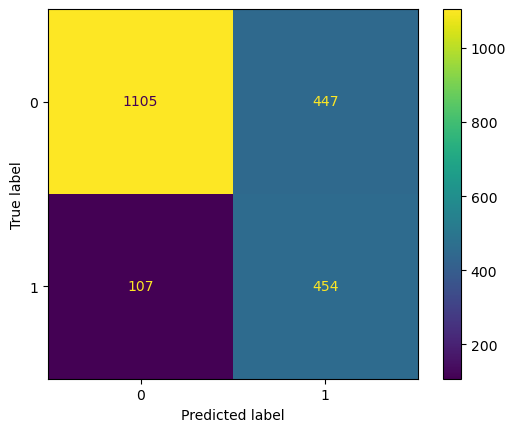

0    1552
1     561
dtype: int64

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,final_pipe.predict(X_test), labels=final_pipe["model"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=final_pipe["model"].classes_)
disp.plot()
plt.show()
pd.Series(y_test).value_counts()

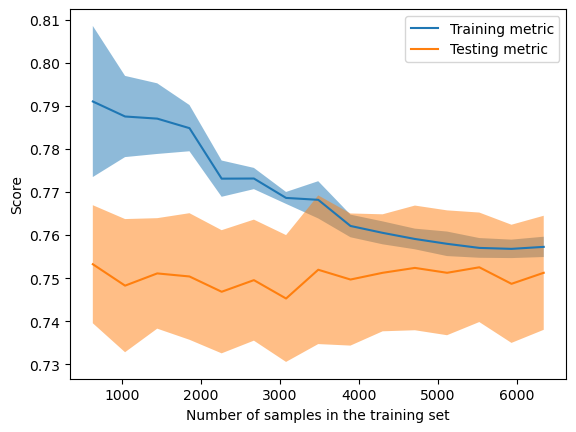

In [81]:
from sklearn.model_selection import LearningCurveDisplay
_ = LearningCurveDisplay.from_estimator(
    final_pipe, df_x, df_y, cv=10, n_jobs=-1, score_type= "both", train_sizes= np.linspace(0.1, 1, 15 )
)

In [82]:
# feat_importances = pd.Series(final_pipe["model"].feature_importances_  , index= prep.fit_transform(X_train).columns.tolist() )
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

In [ ]:
# from sklearn.tree import  plot_tree
# plt.figure(figsize=(16,9))
# plot_tree(final_pipe["model"] ,
#           filled = True,
#           rounded = True,
#           class_names= ["4hr pcr", "pcr"],
#           feature_names =  prep.fit_transform(X_train).columns
#             )
# plt.show()